In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from numpy import linalg
import pandas as pd
from sklearn.datasets import load_digits
#import zoopt


In [2]:
#from scipy import optimize
import blackbox as bb

In [3]:
plotting_on = 0
cluster_size = 2
noise_threshold = 10.0
S = 1

In [4]:
def plot_clusters(X, labels):
    chosen_pts_cluster_label = []
    for idx, label in enumerate(labels):
        if label == 0:
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'blue')

        if label == 1:
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'red')

        if mask[idx] == 1:
            chosen_pts_cluster_label.append(label)
            if plotting_on:
                plt.scatter(X[idx,0], X[idx,1], color = 'green')

    if plotting_on:
        plt.show()
    return chosen_pts_cluster_label

def get_Y(labels,n_samples, n_clusters):
    Y = np.zeros([n_samples, n_clusters])
    for idx, label in enumerate(labels):
        Y[idx, label] = 1
    return Y

def run_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    
    temp = np.copy(labels)
    temp_c = np.copy(centers)
    if np.sum(centers[0,:]) > np.sum(centers[1,:]):
        return (labels, centers) 
    else:
        labels[temp == 0] = 1
        labels[temp == 1] = 0
        centers[1,:] = temp_c[0,:]
        centers[0,:] = temp_c[1,:]
        return (labels, centers)
    
def run_ward(n_clusters, X):
    ward = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward')
    labels = ward.fit_predict(X)
    #centers = ward.cluster_centers_
    X_temp = np.copy(X)
    center0 = np.zeros((n_features))
    center1 = np.zeros((n_features))
    n_samples0 = 0
    n_samples1 = 0
    for x,l in zip(X_temp, labels):
        if l == 0:
            center0 += x
            n_samples0 += 1.0
        if l == 1:
            center1 += x
            n_samples1 += 1.0

    center0 = center0/float(n_samples0)
    center1 = center1/float(n_samples1)

    centers = np.zeros((2,n_features))
    centers[0,:] = center0
    centers[1,:] = center1
            
    temp = np.copy(labels)
    temp_c = np.copy(centers)
    if np.sum(centers[0,:]) > np.sum(centers[1,:]):
        return (labels, centers) 
    else:
        labels[temp == 0] = 1
        labels[temp == 1] = 0
        centers[1,:] = temp_c[0,:]
        centers[0,:] = temp_c[1,:]
        return (labels, centers)

    
def add_noise(X,noise):
    for i,(m,_) in enumerate(zip(mask,X)):
        if m != 0:
            X[i,:] = X[i,:] + noise
    return X

def get_dist(Y,Y_dash):
    dist = linalg.norm(np.matmul(Y,Y.T) - np.matmul(Y_dash,Y_dash.T))
    return dist


In [5]:
digits = load_digits()
data = digits.data
y = digits.target
X1 = data[y == 1, :]
X2 = data[y == 4,:]
X = np.vstack((X1,X2))
print(X1.shape, X2.shape)

sample_size = X.shape[0]
mask = np.zeros((sample_size))
n_features = X.shape[1]

X_org = np.copy(X).astype(np.float64)

##kmeans_d = KMeans(n_clusters = cluster_size, random_state=42)
##labels_d = kmeans_d.fit_predict(X)    
##centers_d = kmeans_d.cluster_centers_

ward_d = AgglomerativeClustering(n_clusters = cluster_size, linkage='ward')
labels_d = ward_d.fit_predict(X)    
X_temp_d = np.copy(X)
center0_d = np.zeros((n_features))
center1_d = np.zeros((n_features))
n_samples0_d = 0
n_samples1_d = 0
for x,l in zip(X_temp_d, labels_d):
    if l == 0:
        center0_d += x
        n_samples0_d += 1.0
    if l == 1:
        center1_d += x
        n_samples1_d += 1.0
center0_d = center0_d/float(n_samples0_d)
center1_d = center1_d/float(n_samples1_d)
centers_d = np.zeros((2,n_features))
centers_d[0,:] = center0_d
centers_d[1,:] = center1_d

temp_d = np.copy(labels_d)
temp_c_d = np.copy(centers_d)
if np.sum(centers_d[0,:]) < np.sum(centers_d[1,:]):
    labels_d[temp_d == 0] = 1
    labels_d[temp_d == 1] = 0
    centers_d[1,:] = temp_c_d[0,:]
    centers_d[0,:] = temp_c_d[1,:]


best_vals = []
for idx,label in enumerate(labels_d):
    if label == 1:
        best_vals.append(linalg.norm(X[idx,:] - centers_d[0,:]))
    else:
        best_vals.append(1000000)

best_vals = np.array(best_vals)
best_vals_idx = np.argsort(best_vals)

count = 0
mask_idx = -1
for idx in range(0,sample_size):
    if idx in best_vals_idx[:S]:
        mask[idx] = 1
        count+=1
        mask_idx = idx


((182, 64), (181, 64))


(182, 181)
[[0, 0], [0, 0.016483516483516484], [0, 3.0045079230162104], [0, 3.230313885010017], [0, 0], [0, 6.098810029749255], [0, 1.1768411146864186], [0, 0], [0, 0], [0, 0.04894966911541498], [0, 0.8861939165806567], [0, 0], [0, 8.238024406532695], [0, 9.592996782223302], [0, 0.08947544168538624], [0, 0], [0, 0.016483516483516484], [0, 0.5709580474773845], [0, 0], [0, 5.18074191002368], [0, 13.921285896424015], [0, 2.4000819622366585], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 11.898184688239938], [0, 9.763569303624553], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 3.233137028717141], [0, 1.0135996600084987], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 2.753475805961994], [0, 4.6910630805658435], [0, 0.18582660433489195], [0, 5.298130046748831], [0, 3.0410266529051055], [0, 0.9642857142857144], [0, 0], [0, 0], [0, 2.533908080869407], [0, 1.9878119118450606], [0, 1.8229767470098963], [0, 9.931682957926052], [0, 

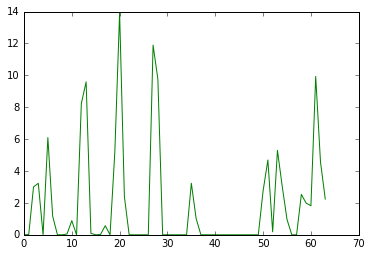

In [6]:
mean_0, mean_1  = np.zeros([64]), np.zeros([64])
for i,l in enumerate(labels_d):
    if l == 0:
        mean_0 += X_org[i]
    if l == 1:
        mean_1 += X_org[i]
mean_0, mean_1 = mean_0/np.sum(1-labels_d), mean_1/np.sum(labels_d)
print(np.sum(1-labels_d), np.sum(labels_d))

delta = mean_0 - mean_1
#delta = centers_d[1,:] - X_org[mask_idx]
Delta = []
for i,d in enumerate(delta):
    if d > 0:
        Delta.append([0,d*1.5])
    #elif d < 0:
    #    Delta.append([d*1.0, 0])
    elif d == 0:
        Delta.append([0,0])
    else:
        Delta.append([0,0])
print(Delta)
plt.plot(Delta)
plt.show()

In [7]:
def f(x):
    success = 0.0
    noise = np.array(x)
    (labels, centers) = run_ward(cluster_size, X_org)
    org_label = labels[mask_idx]
    Y = get_Y(labels, sample_size, cluster_size)
    X_noisy = np.copy(X_org)
    X_noisy  = add_noise(X_noisy, noise)
    (labels_dash, centers_dash) = run_ward(cluster_size, X_noisy)
    noisy_label = labels_dash[mask_idx]
    Y_dash = get_Y(labels_dash, sample_size, cluster_size)  
    dist = get_dist(Y,Y_dash)
    if dist != 0.0:
        return -dist
    else:
        return 1000000.0

In [8]:
bb.search(f=f,  # given function
          box=Delta,  # range of values for each parameter (2D case)
          n=40,  # number of function calls on initial stage (global search)
          m=40,  # number of function calls on subsequent stage (local search)
          batch=4,  # number of calls that will be evaluated in parallel
          resfile='output_zoo.csv')  # text file where results will be saved

In [16]:
#best_noise = [ +0.0000e+00, +5.0158e-03, +8.2205e-01, +7.8575e-01, +0.0000e+00, +1.1191e+00, +1.8135e-01, +0.0000e+00, +0.0000e+00, +3.3177e-03, +3.5109e-02, +0.0000e+00, +5.9110e+00, +6.6217e+00, +5.9348e-02, +0.0000e+00, +1.0058e-02, +3.3349e-01, +0.0000e+00, +2.7597e+00, +7.0635e+00, +1.1577e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +4.0188e+00, +3.0712e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +5.1376e-01, +1.3948e-01, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +1.6401e+00, +2.7091e+00, +1.0398e-01, +2.8707e+00, +1.5944e+00, +4.8882e-01, +0.0000e+00, +0.0000e+00, +1.1553e+00, +8.7328e-01, +7.7087e-01, +4.0381e+00, +1.7861e+00, +8.3964e-01]
best_noise = [+0.0000e+00, +1.6484e-02, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +8.2380e+00, +9.5930e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +5.7096e-01, +0.0000e+00, +5.1807e+00, +0.0000e+00, +2.4001e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +1.1898e+01, +9.7636e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +1.0136e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +5.2981e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +0.0000e+00, +2.5339e+00, +1.9878e+00, +0.0000e+00, +9.9317e+00, +0.0000e+00, +2.2418e+00]
np.save('wip_X_org.npy', X_org)
np.savetxt('X_org.csv', X_org, delimiter=',')
X_adv = np.copy(X_org)
X_adv = add_noise(X_adv, best_noise)
np.savetxt('X_adv.csv', X_adv, delimiter=',')
np.save('wip_X_adv.npy', X_adv)
print(mask_idx)

232


In [17]:
Xo = np.load('wip_X_org.npy')
Xa = np.load('wip_X_adv.npy')

lo,_ = run_ward(2, Xo)
la,_ = run_ward(2, Xa)

In [18]:
print(lo,la)


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [19]:
print(lo[mask_idx],la[mask_idx])
np.savetxt('lo.csv', lo, delimiter=',')
np.savetxt('la.csv', la, delimiter=',')

(1, 0)


In [20]:
count_diffs = 0
perturbed_idx = []
for idx,(el1, el2) in enumerate(zip(lo,la)):
    if el1 != el2:
        count_diffs += 1
        perturbed_idx.append(idx)
print(count_diffs)

24


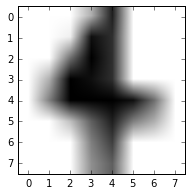

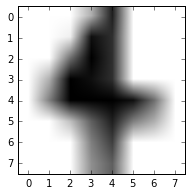

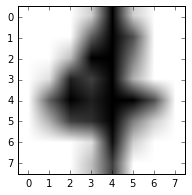

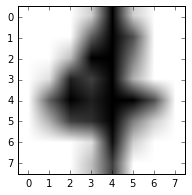

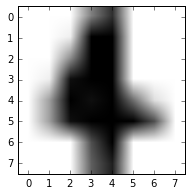

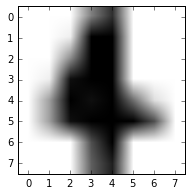

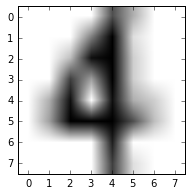

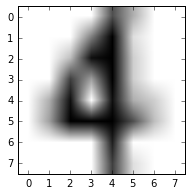

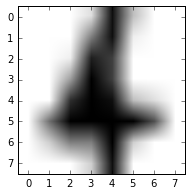

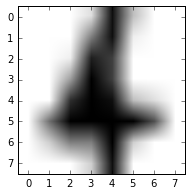

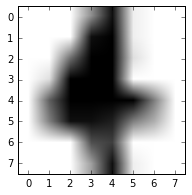

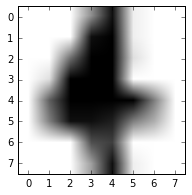

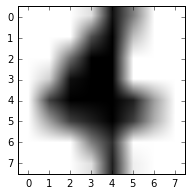

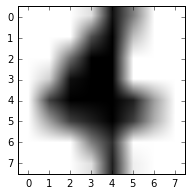

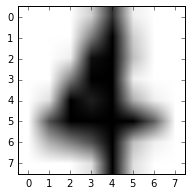

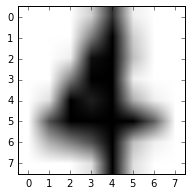

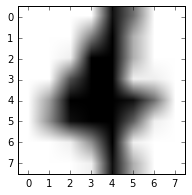

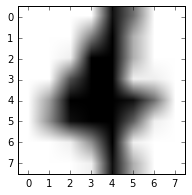

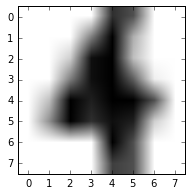

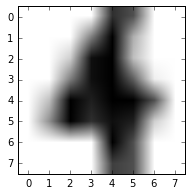

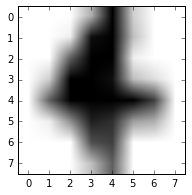

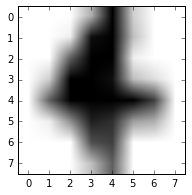

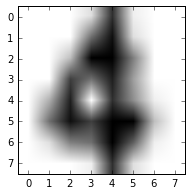

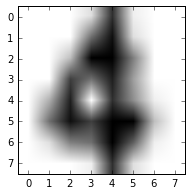

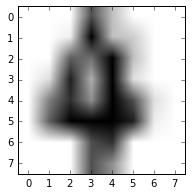

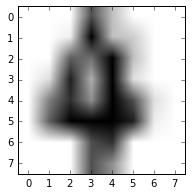

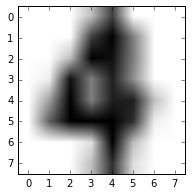

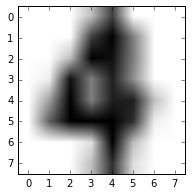

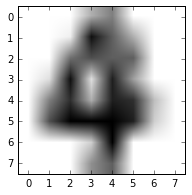

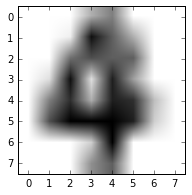

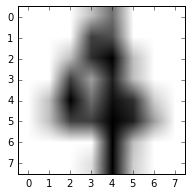

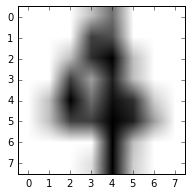

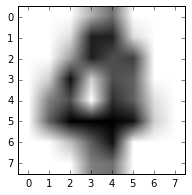

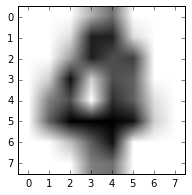

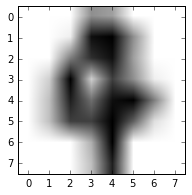

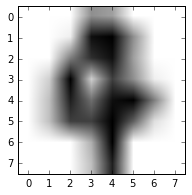

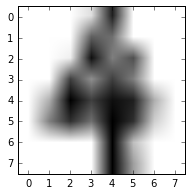

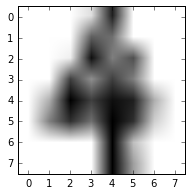

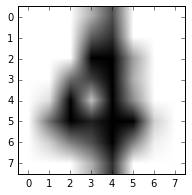

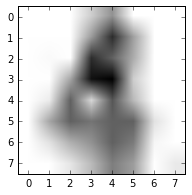

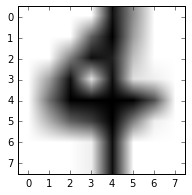

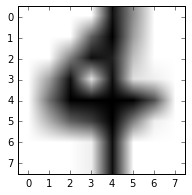

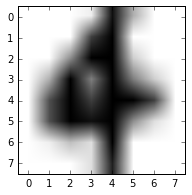

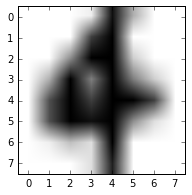

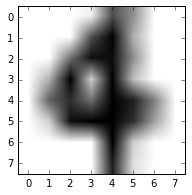

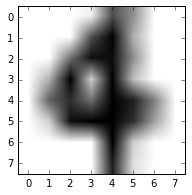

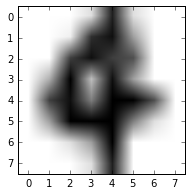

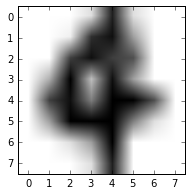

In [21]:
for idx, (org,noisy) in enumerate(zip(Xo, Xa)):
    if idx in perturbed_idx or idx == mask_idx:
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(org,(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(noisy,(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##

In [15]:
for i in perturbed_idx:
    print(lo[i], la[i], y[i])

(1, 0, 6)
(1, 0, 6)
(1, 0, 4)
(1, 0, 9)
(1, 0, 1)
(1, 0, 5)
(1, 0, 0)
(1, 0, 9)
(1, 0, 5)
(1, 0, 2)
(1, 0, 8)
(1, 0, 9)
(1, 0, 1)
(1, 0, 7)
(1, 0, 8)
(1, 0, 4)
(1, 0, 1)
(1, 0, 4)
(1, 0, 5)
(1, 0, 6)
(1, 0, 5)
(1, 0, 4)
(1, 0, 9)
(1, 0, 0)


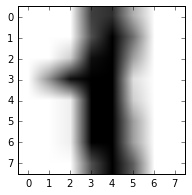

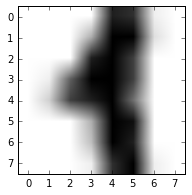

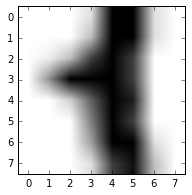

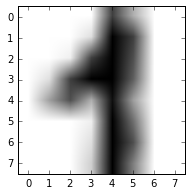

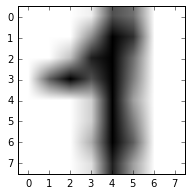

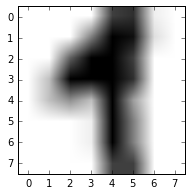

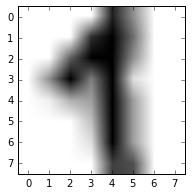

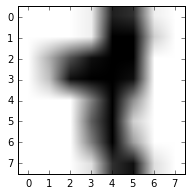

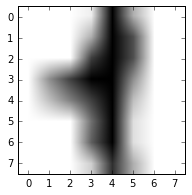

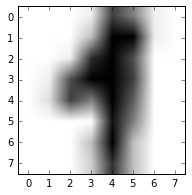

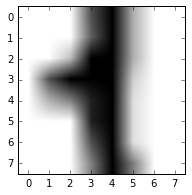

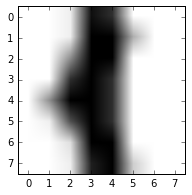

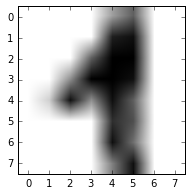

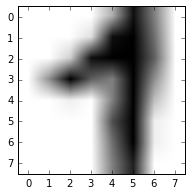

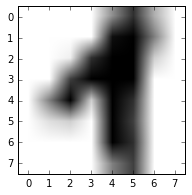

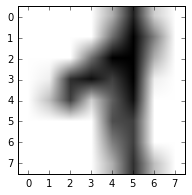

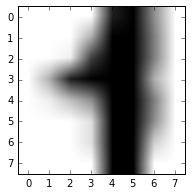

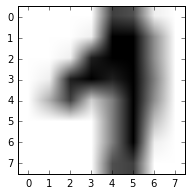

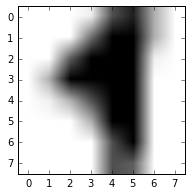

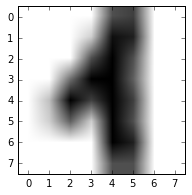

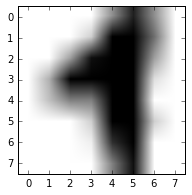

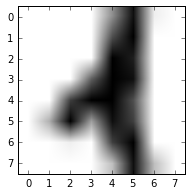

KeyboardInterrupt: 

In [16]:
for i,l in enumerate(lo):
    if l == 0:
        plt.figure(1,figsize=(3,3)) ##
        plt.imshow(np.reshape(Xo[i,:],(8,8)), cmap=plt.cm.gray_r) ##
        plt.show() ##